In [2]:
import torch
from taskdataset import TaskDataset

dataset = torch.load("data/ModelStealingPub.pt")
print(dataset.ids, dataset.imgs, dataset.labels)

[73838, 59663, 288406, 173427, 188902, 234148, 144899, 279150, 278728, 273365, 180360, 39315, 136895, 139704, 280245, 299367, 246678, 121676, 236132, 212637, 258719, 293008, 277545, 18553, 290025, 234026, 226018, 67057, 67140, 291831, 165296, 37874, 62605, 260708, 148780, 268568, 159775, 213955, 249310, 20368, 91717, 270940, 67836, 202789, 157019, 273119, 71731, 170337, 75643, 235765, 248074, 229673, 95671, 24293, 88351, 139101, 125775, 45602, 217548, 48563, 140824, 212804, 212017, 147560, 125940, 239277, 267927, 130258, 154153, 94230, 33590, 96277, 39689, 139712, 141579, 69209, 58416, 110625, 260534, 114705, 164862, 166776, 287901, 249265, 264953, 183620, 79234, 10433, 157312, 202059, 26619, 27, 13065, 101823, 117246, 174305, 113634, 275206, 245420, 85802, 254973, 278454, 303185, 188534, 183986, 73718, 32468, 73775, 174543, 160625, 219435, 243481, 235160, 89650, 16284, 148987, 109162, 264657, 156910, 266468, 268777, 222653, 49759, 54718, 85900, 275915, 276549, 169902, 98263, 182424, 1

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
len(dataset)

13000

In [5]:
dataset[0]

(73838, <PIL.Image.Image image mode=RGB size=32x32>, '40019202')

In [6]:
img = dataset[0][1]

In [75]:
type(img)

PIL.Image.Image

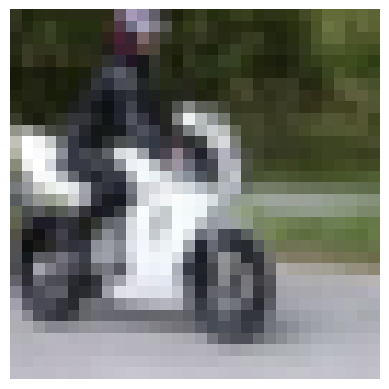

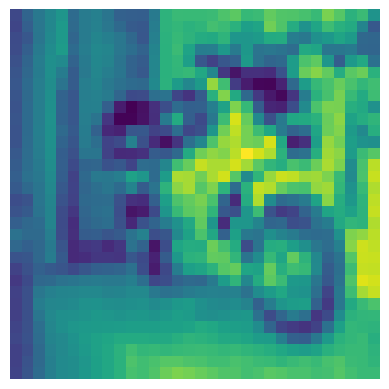

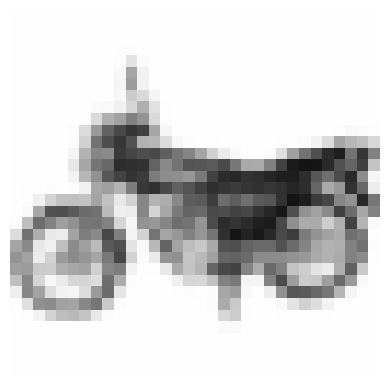

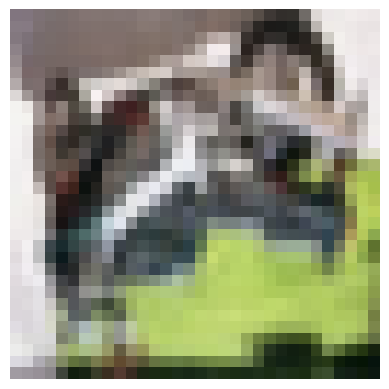

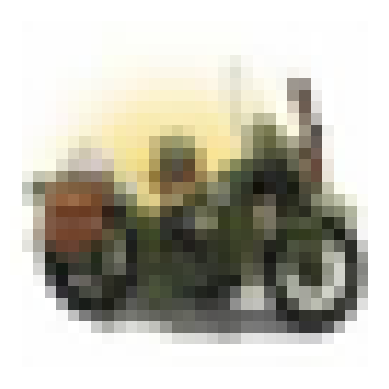

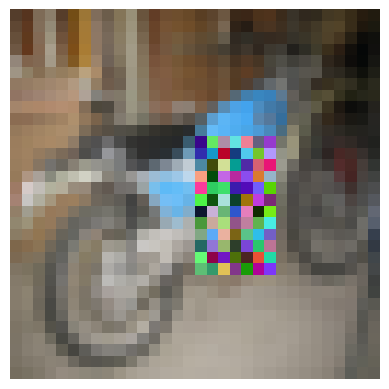

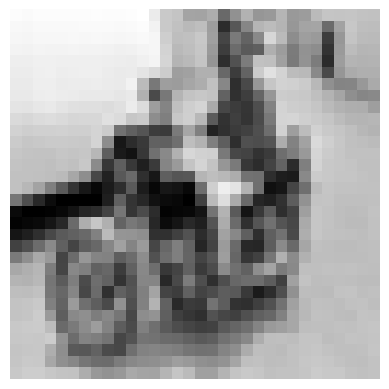

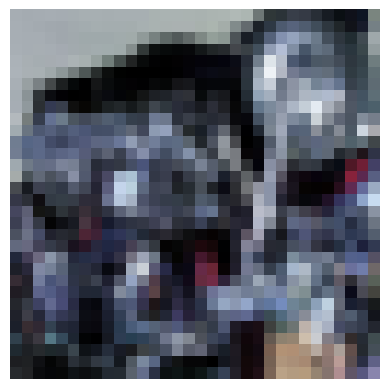

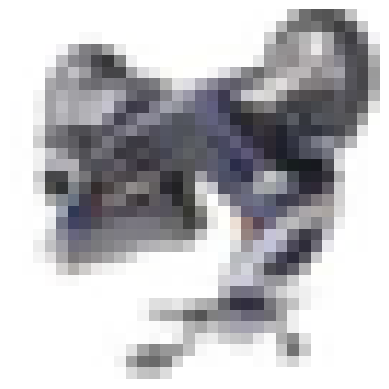

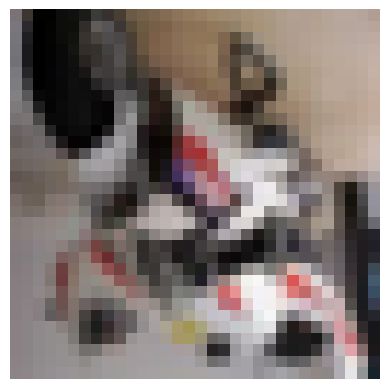

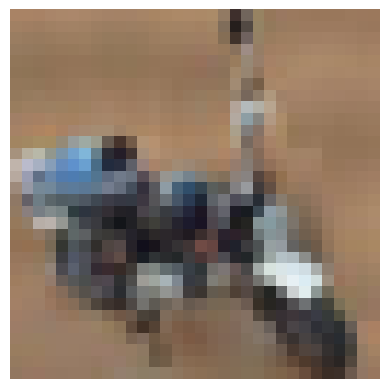

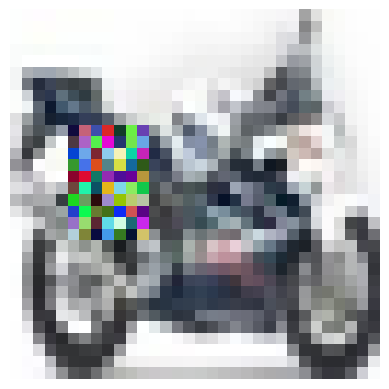

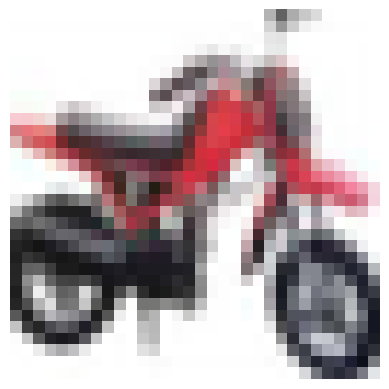

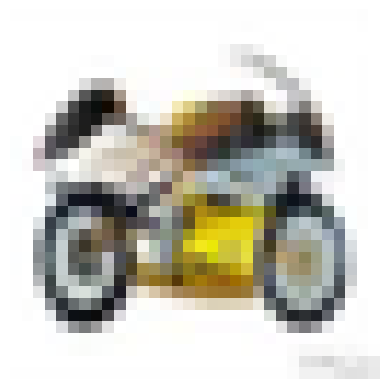

In [24]:
for i in range(13000):
    if dataset[i][2] == '75313326':
        plt.imshow(dataset[i][1])  # 'cmap='gray'' is used for grayscale images.
        plt.axis('off')  # Optionally remove the axis.
        plt.show()

In [54]:
import re

In [55]:
def extract_mode(text):
    # Define a regular expression pattern to match "mode=" followed by any non-space characters
    pattern = r'mode=([^ ]+)'
    
    # Search for the pattern in the text
    match = re.search(pattern, text)
    
    # If a match is found, return the extracted mode, otherwise return None
    if match:
        return match.group(1)
    else:
        return None

# Example text
text = 'This is a sample text with mode=123 and some additional information.'

# Extract mode from the text
mode = extract_mode(text)

In [60]:
list_col= []
for i in range(13000):
    list_col.append(extract_mode(str(dataset[i][1])))

In [61]:
pd.DataFrame(list_col).value_counts()


RGB    11644
L       1356
dtype: int64

In [15]:
pd.DataFrame(dataset[:][2]).value_counts()

62225416    1775
62014378    1584
15103694    1346
90386222    1134
26466207     833
14119474     502
75652382     443
83450130     423
24683694     420
70483417     378
31527279     360
40019202     340
75986657     329
50011542     325
15256249     316
68395620     286
64963739     278
10964686     273
55364435     270
33633783     265
23255817     178
19888903     155
67716412     110
43338066      78
74777746      72
65142471      66
6661858       52
93429558      41
23659574      37
77329636      32
37206695      32
32036533      27
92257871      26
80504125      19
75477331      18
47140557      17
85864573      16
12076452      16
78173080      16
9410583       15
75313326      14
15258297      13
32369775      13
91097190      12
34183981      10
98460345      10
79051840       9
20200178       9
40835903       4
47511766       3
dtype: int64

In [65]:
df = pd.DataFrame({'ID': dataset[:][0],'RGB': list_col, 'Target':dataset[:][2] })

In [68]:
df.groupby(["Target", "RGB"])["ID"].count().head(50)

Target    RGB
10964686  L        30
          RGB     243
12076452  L         1
          RGB      15
14119474  L        55
          RGB     447
15103694  L       136
          RGB    1210
15256249  L        36
          RGB     280
15258297  L         1
          RGB      12
19888903  L        14
          RGB     141
20200178  L         1
          RGB       8
23255817  L        22
          RGB     156
23659574  L         3
          RGB      34
24683694  L        41
          RGB     379
26466207  L        90
          RGB     743
31527279  L        21
          RGB     339
32036533  L         4
          RGB      23
32369775  RGB      13
33633783  L        35
          RGB     230
34183981  L         1
          RGB       9
37206695  L         2
          RGB      30
40019202  L        35
          RGB     305
40835903  RGB       4
43338066  L        11
          RGB      67
47140557  L         3
          RGB      14
47511766  L         1
          RGB       2
50011542  L       

In [69]:
df[df['RGB'] == 'RGB']['Target'].value_counts()

62225416    1576
62014378    1400
15103694    1210
90386222    1025
26466207     743
14119474     447
83450130     389
75652382     386
24683694     379
31527279     339
70483417     334
40019202     305
75986657     304
50011542     286
15256249     280
68395620     256
55364435     255
64963739     252
10964686     243
33633783     230
23255817     156
19888903     141
67716412      99
43338066      67
74777746      66
65142471      64
6661858       44
93429558      39
23659574      34
37206695      30
77329636      28
32036533      23
92257871      22
80504125      17
75477331      17
12076452      15
85864573      14
47140557      14
9410583       14
78173080      13
32369775      13
75313326      13
15258297      12
98460345       9
34183981       9
79051840       9
91097190       9
20200178       8
40835903       4
47511766       2
Name: Target, dtype: int64

In [32]:
data_list = list(dataset)

In [36]:
data = pd.DataFrame(data_list, columns =['id','img','Target'])

In [44]:
data[data['Target'] == '75313326']['img']


816      <PIL.Image.Image image mode=RGB size=32x32 at ...
2513     <PIL.Image.Image image mode=L size=32x32 at 0x...
3111     <PIL.Image.Image image mode=RGB size=32x32 at ...
5656     <PIL.Image.Image image mode=RGB size=32x32 at ...
6108     <PIL.Image.Image image mode=RGB size=32x32 at ...
6471     <PIL.Image.Image image mode=RGB size=32x32 at ...
7305     <PIL.Image.Image image mode=RGB size=32x32 at ...
7490     <PIL.Image.Image image mode=RGB size=32x32 at ...
9035     <PIL.Image.Image image mode=RGB size=32x32 at ...
10117    <PIL.Image.Image image mode=RGB size=32x32 at ...
11154    <PIL.Image.Image image mode=RGB size=32x32 at ...
11529    <PIL.Image.Image image mode=RGB size=32x32 at ...
11945    <PIL.Image.Image image mode=RGB size=32x32 at ...
12478    <PIL.Image.Image image mode=RGB size=32x32 at ...
Name: img, dtype: object

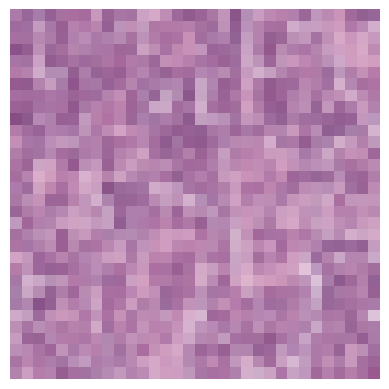

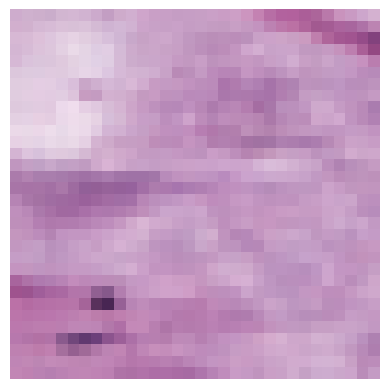

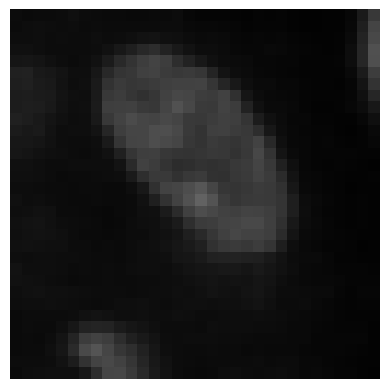

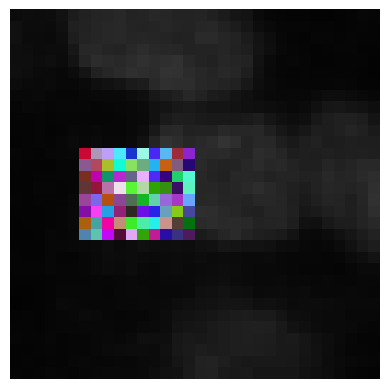

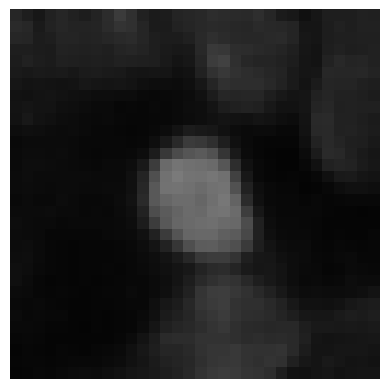

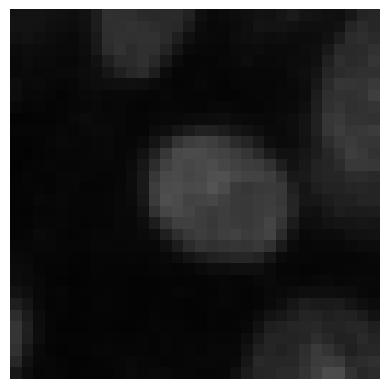

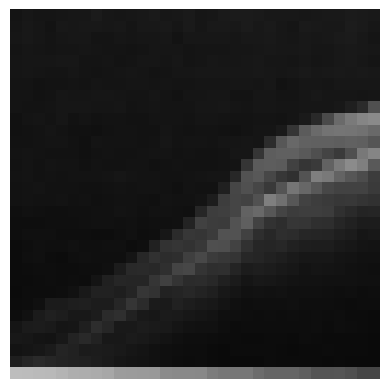

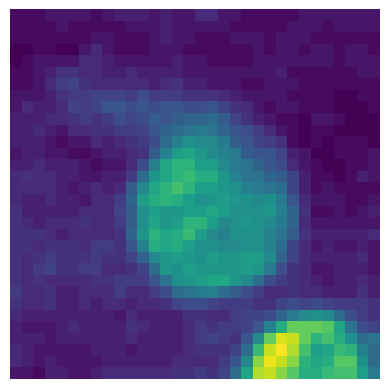

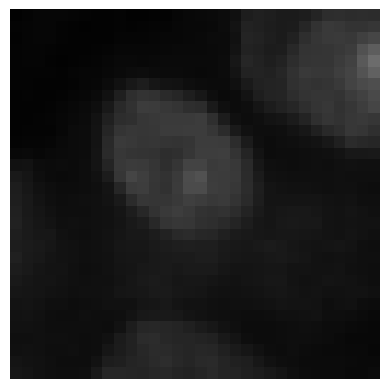

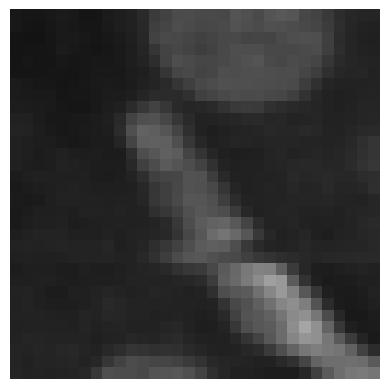

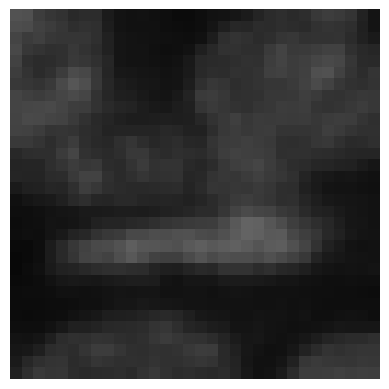

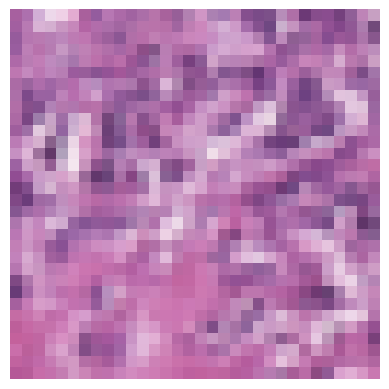

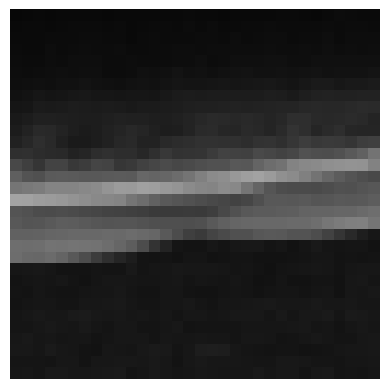

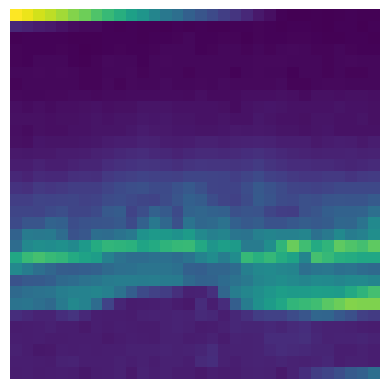

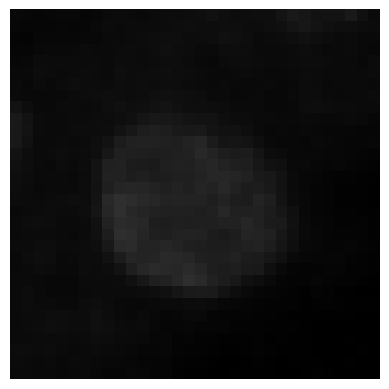

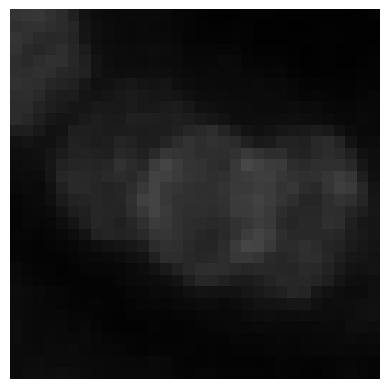

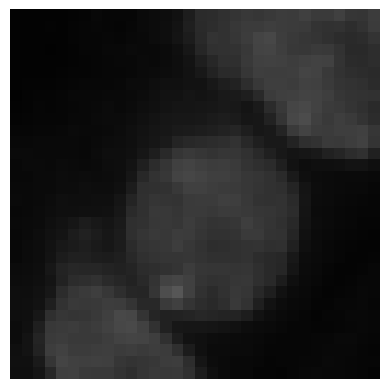

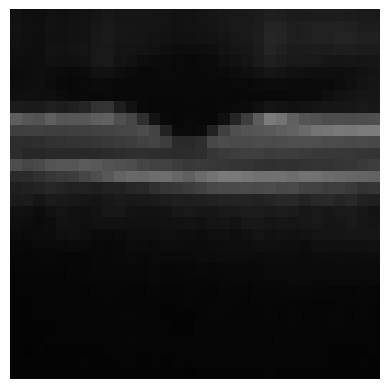

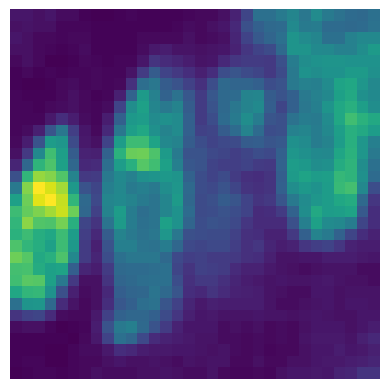

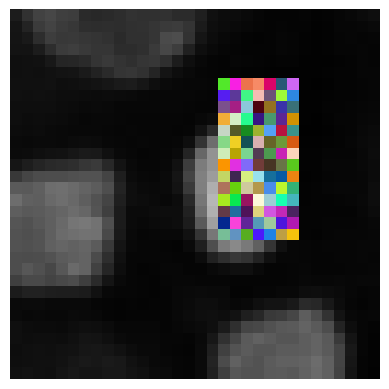

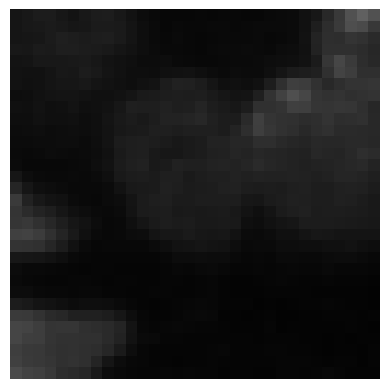

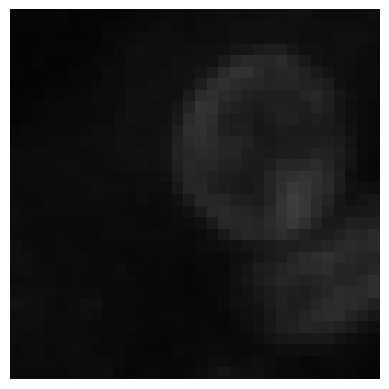

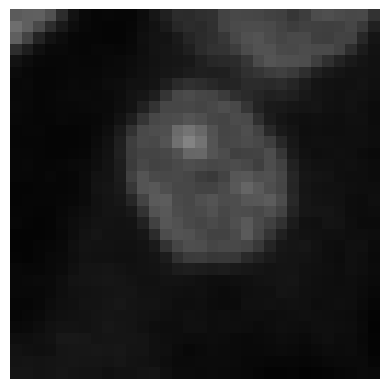

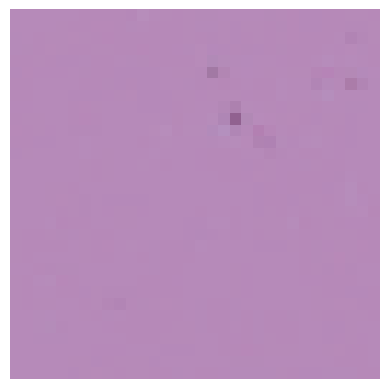

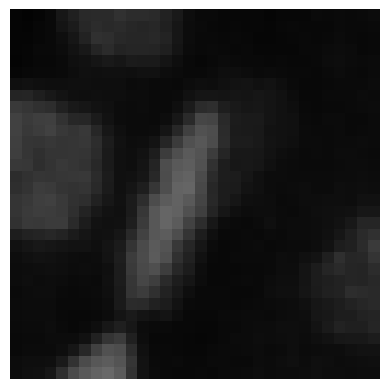

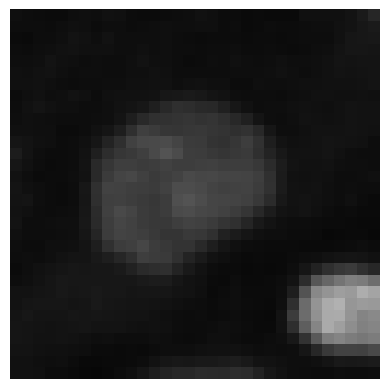

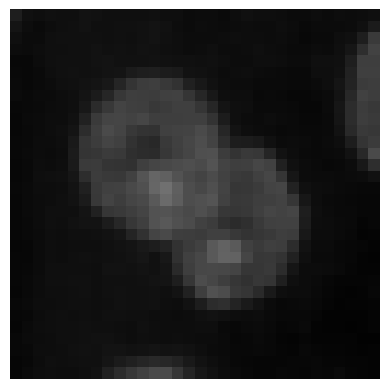

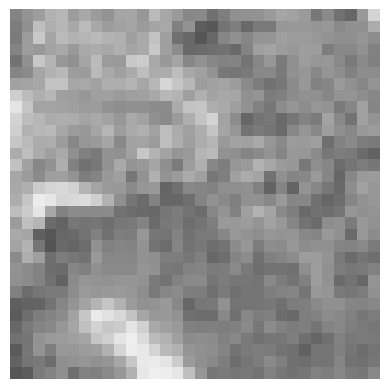

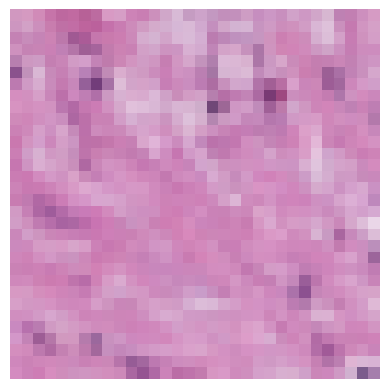

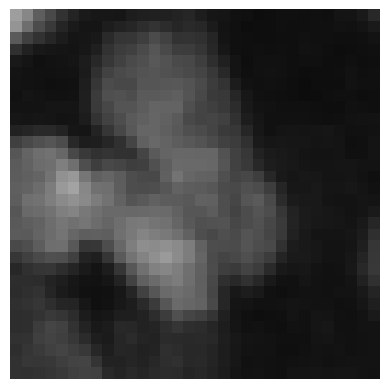

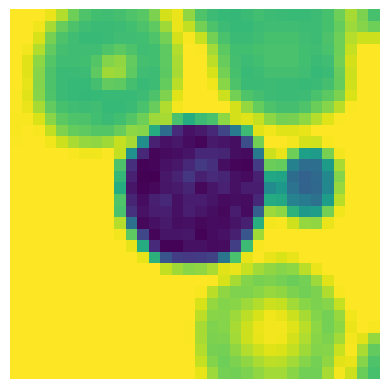

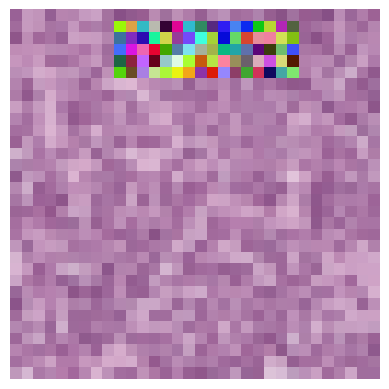

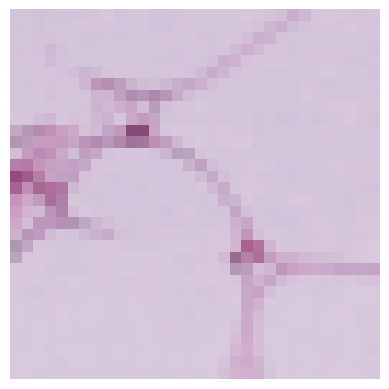

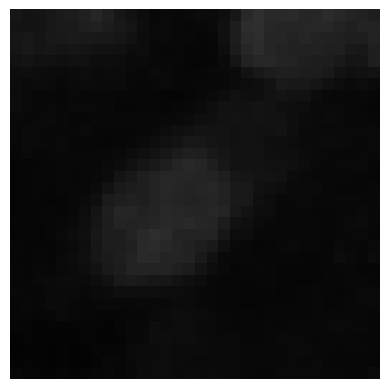

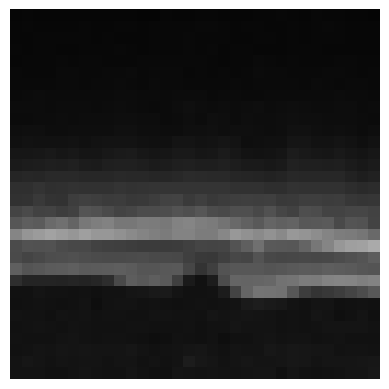

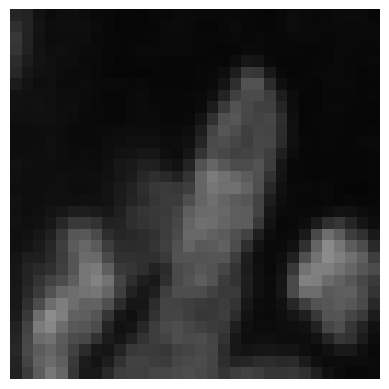

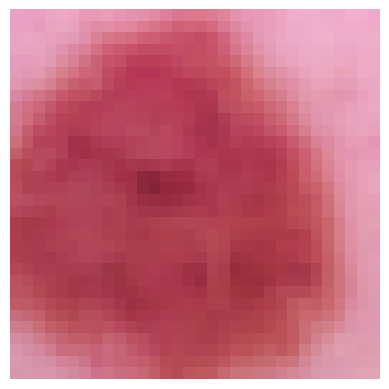

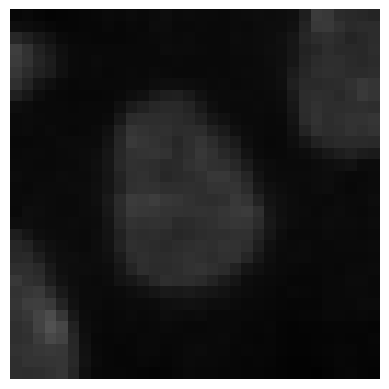

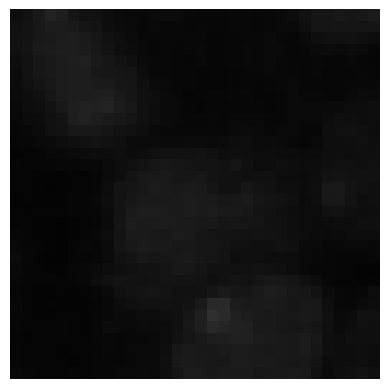

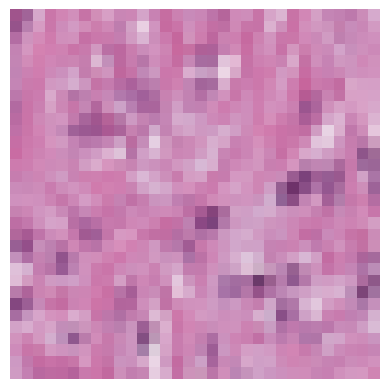

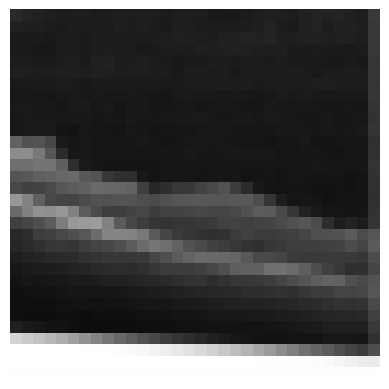

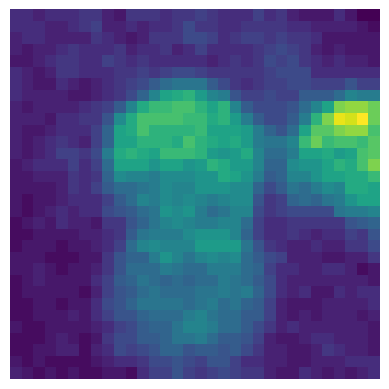

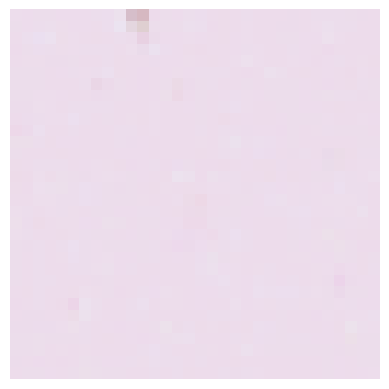

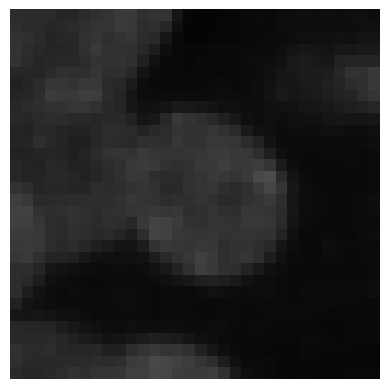

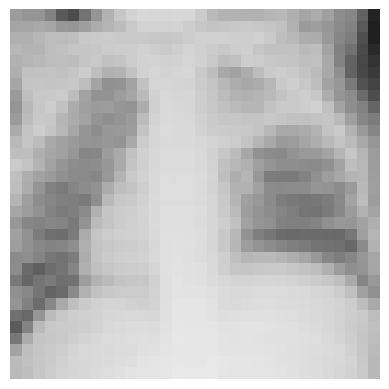

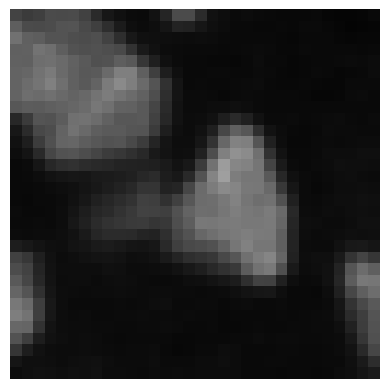

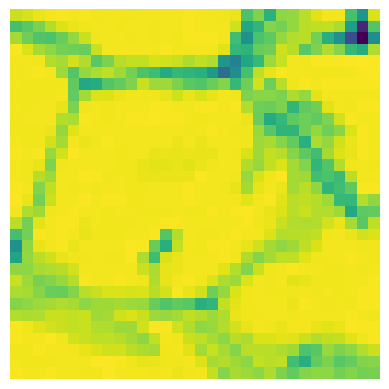

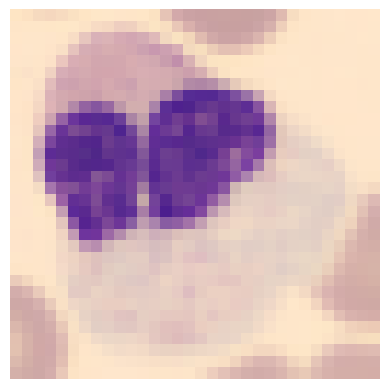

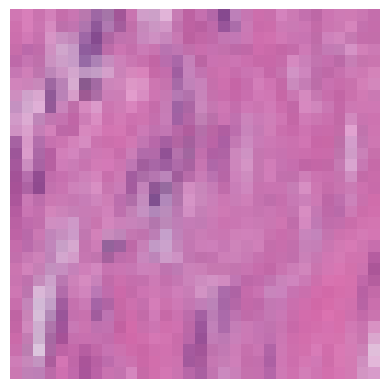

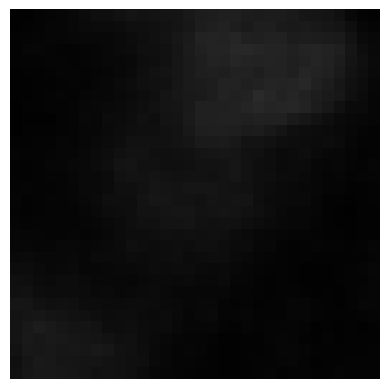

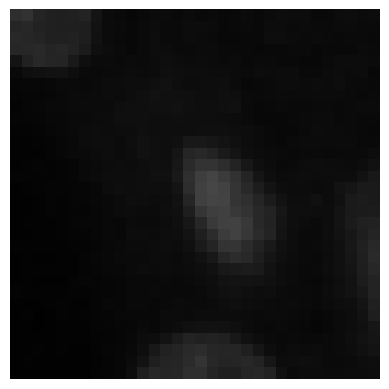

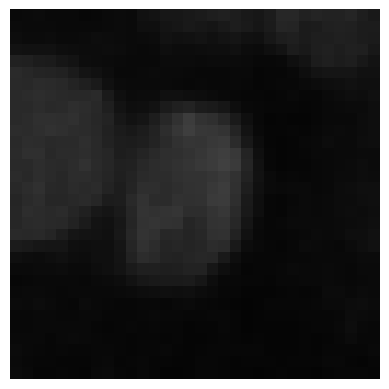

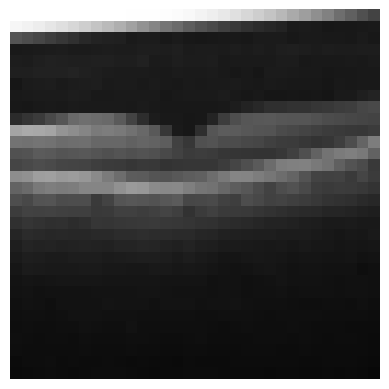

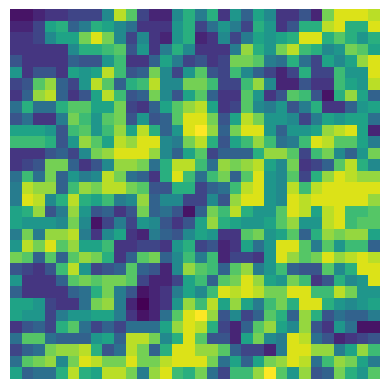

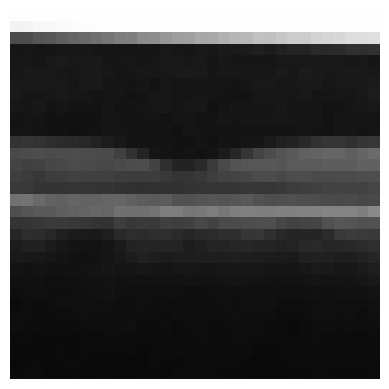

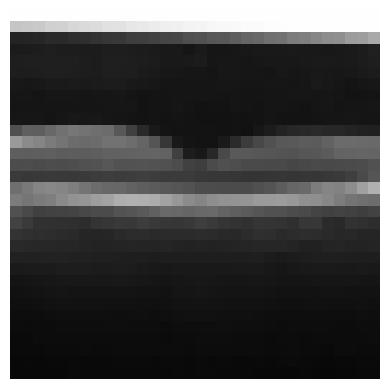

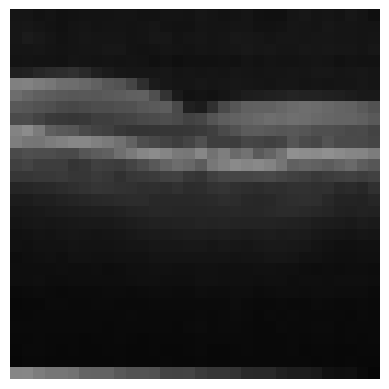

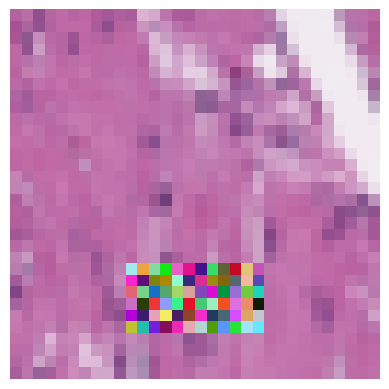

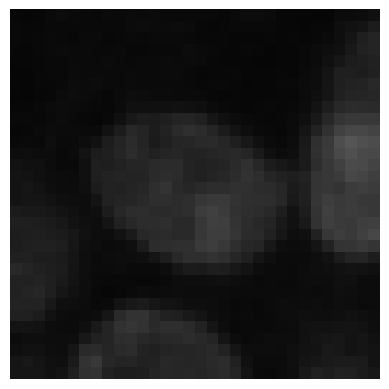

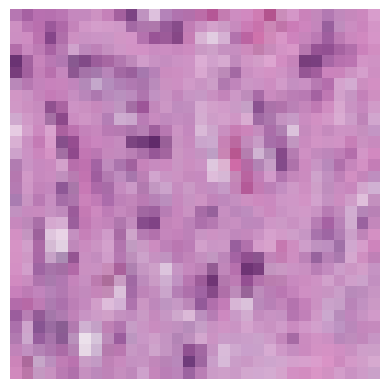

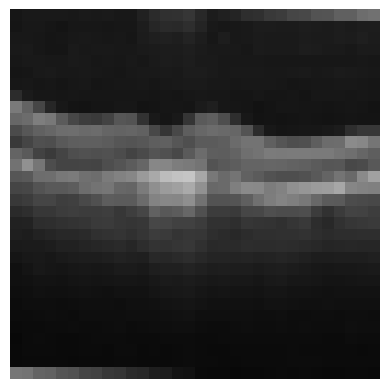

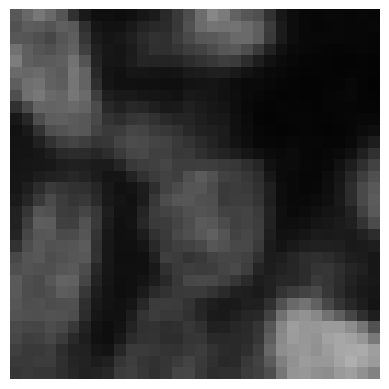

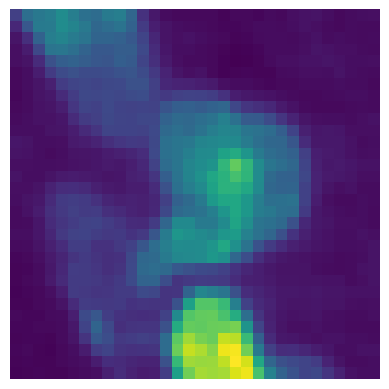

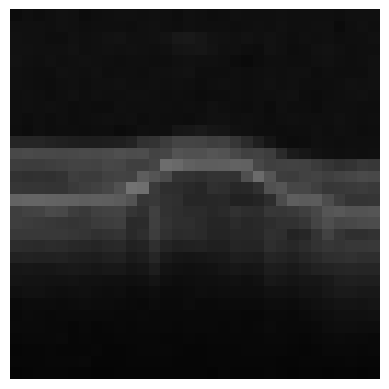

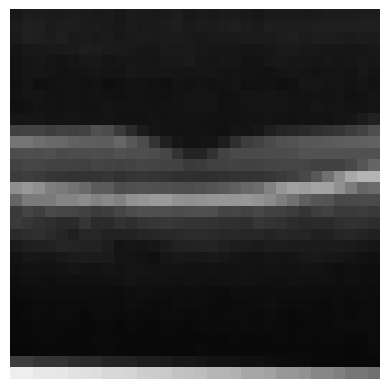

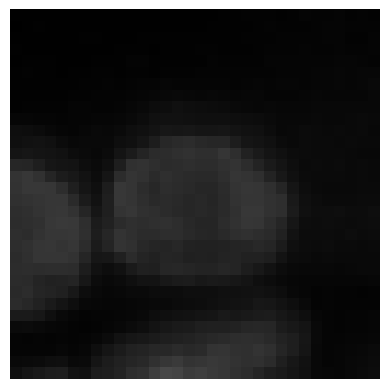

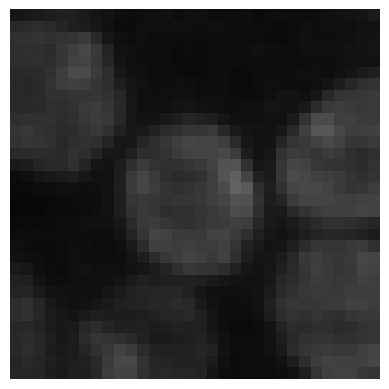

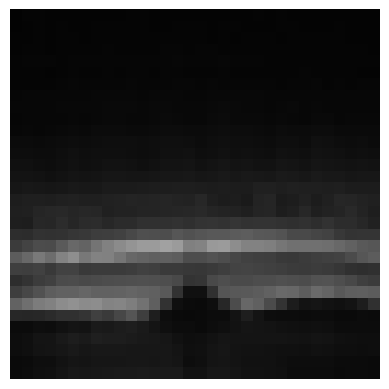

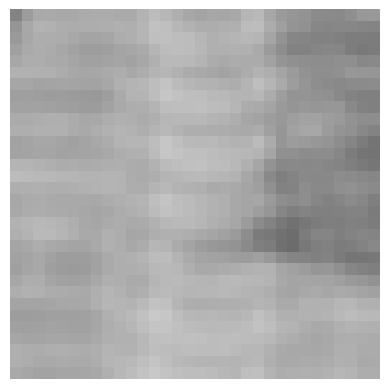

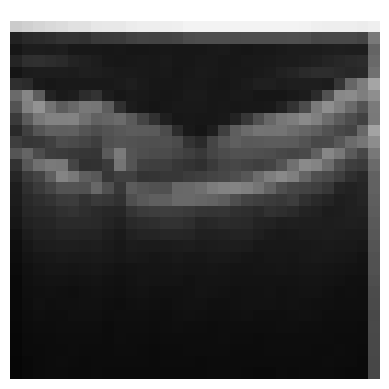

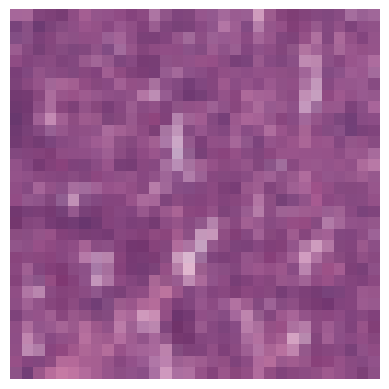

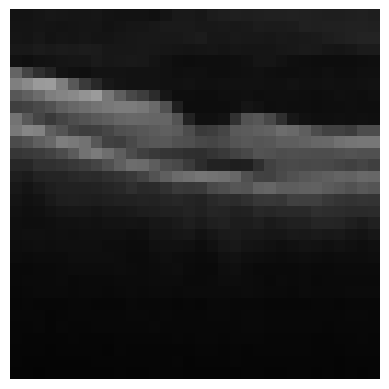

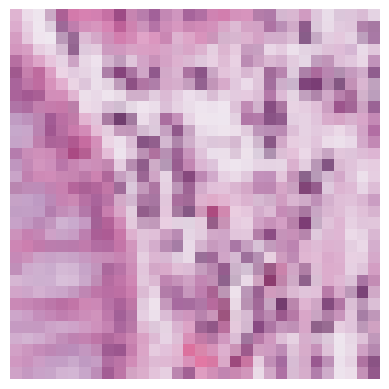

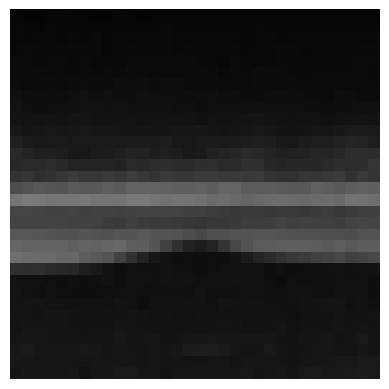

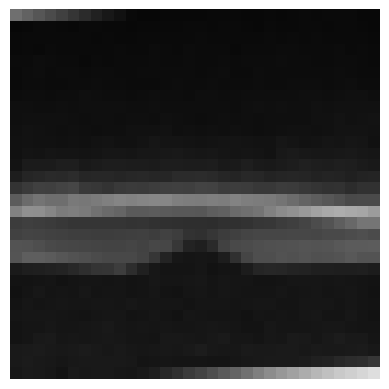

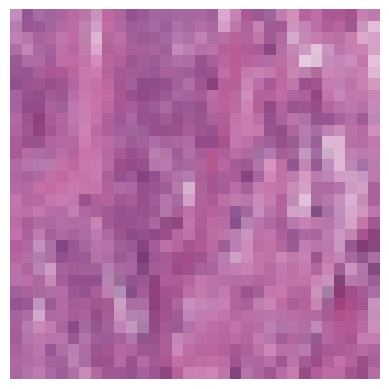

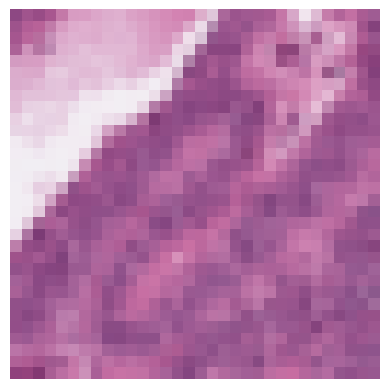

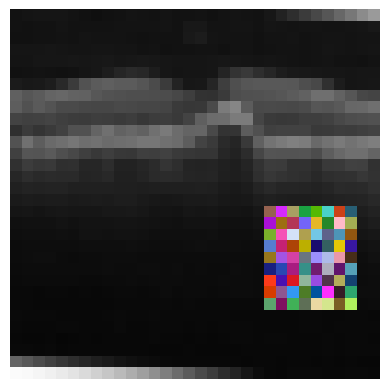

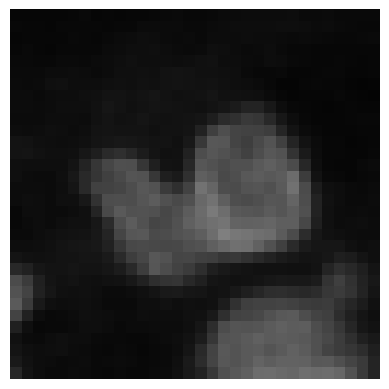

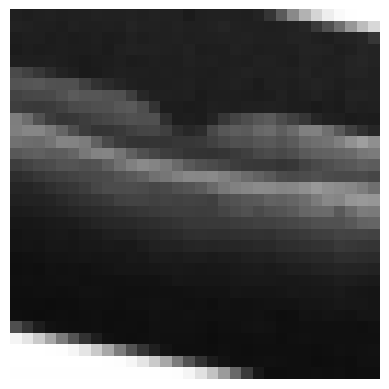

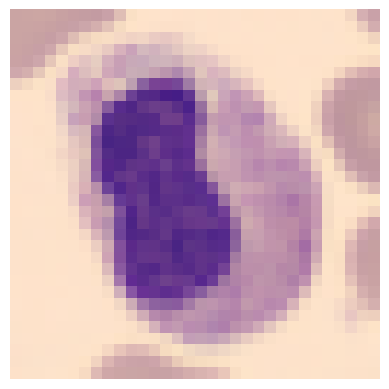

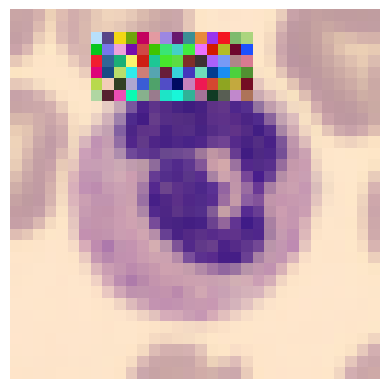

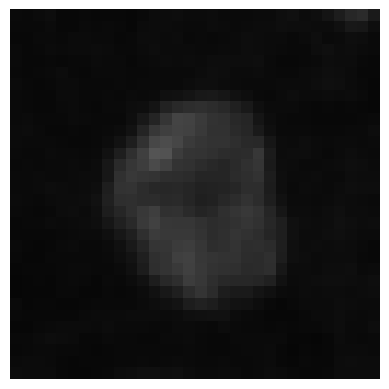

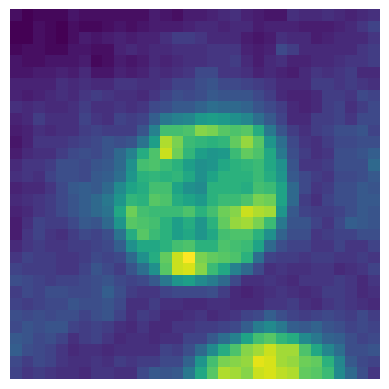

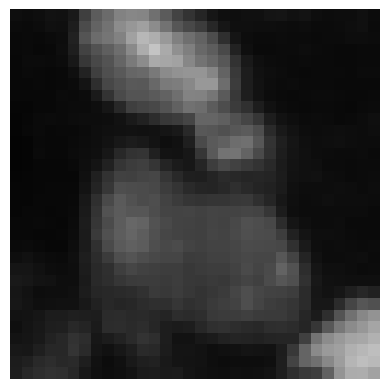

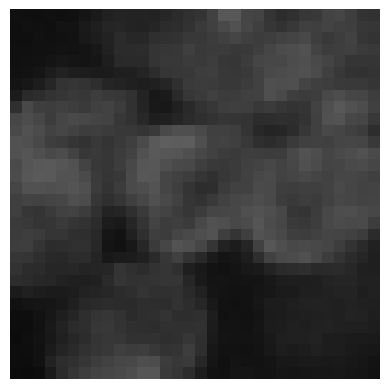

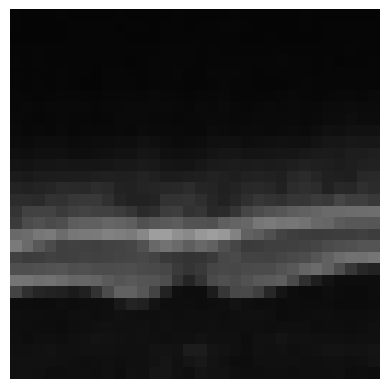

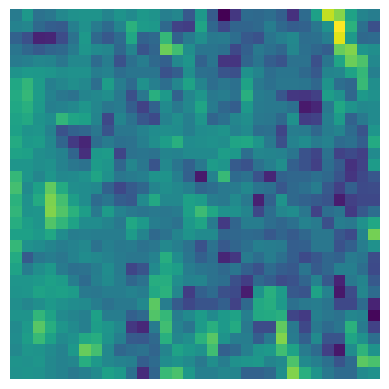

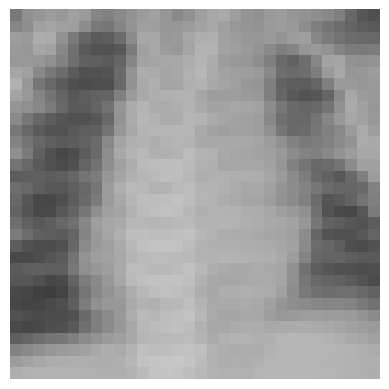

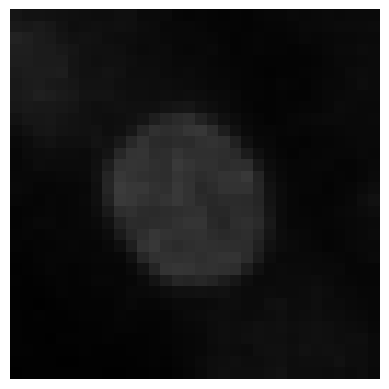

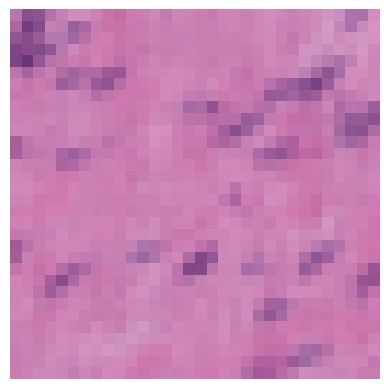

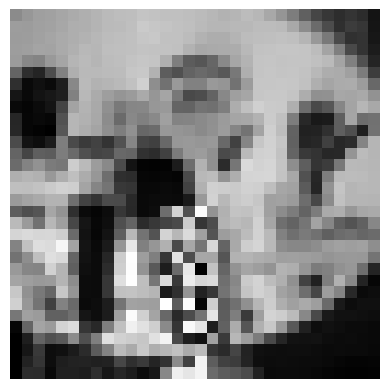

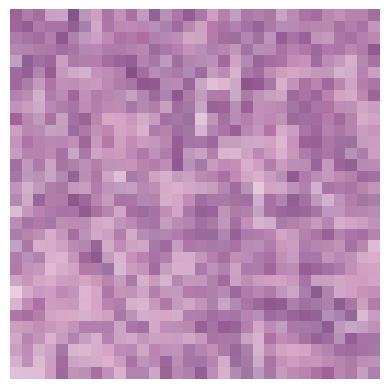

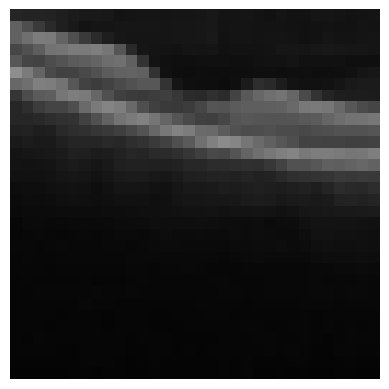

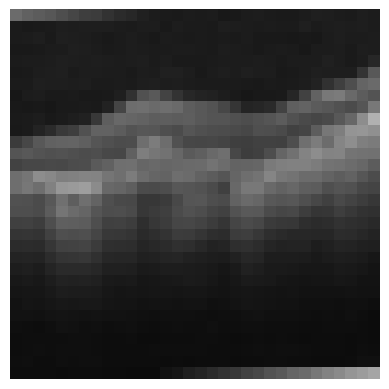

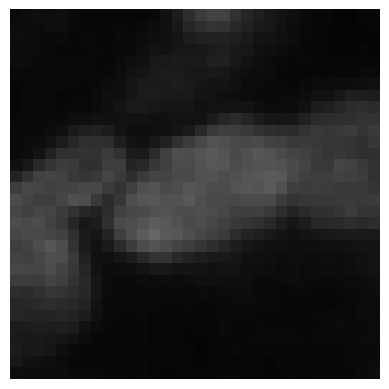

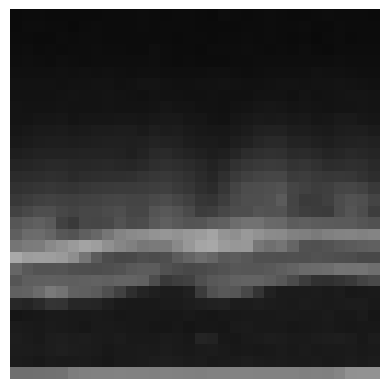

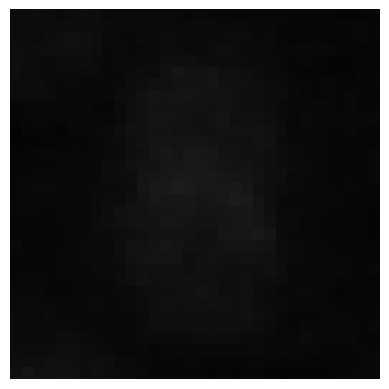

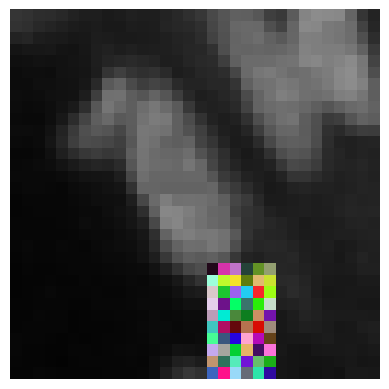

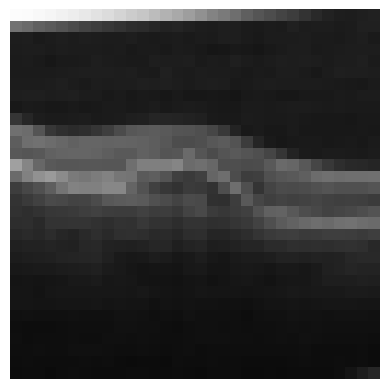

In [7]:
for i in range(100):
    plt.imshow(dataset[i][1])  # 'cmap='gray'' is used for grayscale images.
    plt.axis('off')  # Optionally remove the axis.
    plt.show()

In [21]:

image_path = 'mnist_five.png'  # Specify the path and file name where you want to save the image

# Save the image
dataset[0][1].save(image_path)


In [ ]:
def model_stealing(path_to_png_file: str):
    SERVER_URL = "[paste server url here]"
    ENDPOINT = "/modelstealing"
    URL = SERVER_URL + ENDPOINT

    TEAM_TOKEN = "[paste your team token here]"

    with open(path_to_png_file, "rb") as img_file:
        response = requests.get(
            URL, files={"file": img_file}, headers={"token": "juU0vkSeNhJdtzj7"}
        )

        if response.status_code == 200:
            return json.loads(response.content.decode())["representation"]
        else:
            raise Exception(f"Request failed. Status code: {response.status_code}, content: {response.content}")